# Эмпирический анализ временной сложности алгоритмов
Лабораторная работа № 1.Вариант 16

<!-- #region -->
## Задания
Для $n$ от 1 до $10^5 \cdot N$ c шагом $100 \cdot N$, где $N = (20 - \text{номер студента в списке группе})$, произведите для пяти запусков замер среднего машинного времени исполнения программ, реализующих нижеуказанные алгоритмы и функции. 

Изобразите на графике полученные данные, отражающие зависимость среднего времени исполнения от $n$. 
Проведите теоретический анализ временной сложности рассматриваемых алгоритмов и сравните эмпирическую и теоретическую временные сложности.

<!-- #regio
## Задание 1

Сгенерируйте $n$-мерный случайный вектор $v = [v_1, v_2, ..., v_n]$ с
неотрицательными элементами. 

Для полученного вектора $v$ осуществите подсчет функций и реализацию алгоритмов:


| №  | Оценивание | Функция | Вариант | Примечание |
|:--|:----------:|:-------|:-------|:----------:|
| 1.1. постоянная функция                      | 2 балла | $f_1(v) = N$                               | 2, 4, 5, 7, 9, 11, 13, 15, 16 ||
| 1.2. сумма элементов                         | 2 балла | $f_2(v) = \sum\limits_{k=1}^{n} {v_k}$     | 1, 3, 6, 8, 10, 12, 14, 17||
| 1.3  произведение элементов                  | 2 балла | $f_3(v) = \prod\limits_{k=1}^{n} {v_k}$    | 1, 2, 5, 6, 7, 10, 11, 14, 15, 16 ||
| 1.4. вычисление полинома методом Горнера [2] | 2 балла | $f_4(v) = v_1 + x (v_2 + x(v_3+ \ldots))$, | 2, 4, 6, 9, 10, 11, 13, 1617| $x = 1.5 \cdot N$|
| 1.5. поиск максимума простым перебором       | 2 балла | $f_5(v) = \max(v)$                         | 1, 3, 4, 7, 8, 9, 12, 14, 16 ||
| 1.6. поиск минимума простым перебором        | 2 балла | $f_6(v) = \min(v)$                         | 3, 5, 6, 8, 10, 13, 15, 17 ||
| 1.7. среднее арифметическое                  | 2 балла | $f_7(v) = \cfrac{1}{n} \cdot \sum\limits_{k=1}^{n} {v_k}$   | 1, 2, 4, 9, 11, 12, 13, 14, 15, 16 ||
| 1.8. среднее гармоническое                   | 2 балла | $f_8(v) = \cfrac{n}{\sum\limits_{k=1}^{n} {\frac{1}{v_k}}}  $ | 3, 5, 7, 8, 12, 14, 17| |



## Задание 2

(2 балла)

Сгенерируйте случайные матрицы $A$ и $B$ размером $n × n$ с неотрицательными элементами. 

Найдите обычное матричное произведение матриц $A$ и $B$.


## Примечания

Для замера времени работы функции и построения графиков, можно воспользоваться примером, приведенным здесь:

https://github.com/askras/trypython/blob/main/projects/profilers/usage_ime_ru.ipynb
<!-- #endregion -->


In [ ]:
import functools
import timeit
import typing
import matplotlib.pyplot as plt
import random
import nampy as np

N = 20 - 16
n = N*(10**5)
x = 1.5*N
step = 100*N
vec = [random.randint(1, 1000) for _ in range(n)]
name_vec = ['1.1 Constant function', '1.3 The product of the elements 2.0', '1.4 Calculation of the polynomial by the Gorner method', 
            '1.5 Searching for the maximum by simple brute force', '1.7 Arithmetic mean', '2 Matrix multiplication']
A = np.array([[random.randint(1, 1000) for _ in range(n//400)] for _ in range(n//400)])
B = np.array([[random.randint(1, 1000) for _ in range(n//400)] for _ in range(n//400)])

def creater_grafs(func, name, matrix) :
    if matrix:
        items = [i for i in range(1, n//400, step//10)]
        times = [func(A[:i, :i], B[:i, :i]) for i in items]
    else:
        items = [i for i in range(1, n, step)]
        times = [func(vec[:i]) for i in items]     
    fig = plt.plot(items, times, 'bo-')
    plt.title(name)
    ax = plt.gca()
    ax.set_xlabel('Number of elements, $n$ ')
    ax.set_ylabel('Time, sec')
    plt.savefig(name + '.png')
            

In [ ]:
def f1(v) :
    return N

func = get_usage_time(number=5, ndigits=5)(f1)
creater_grafs(func, name_vec[0], 0)

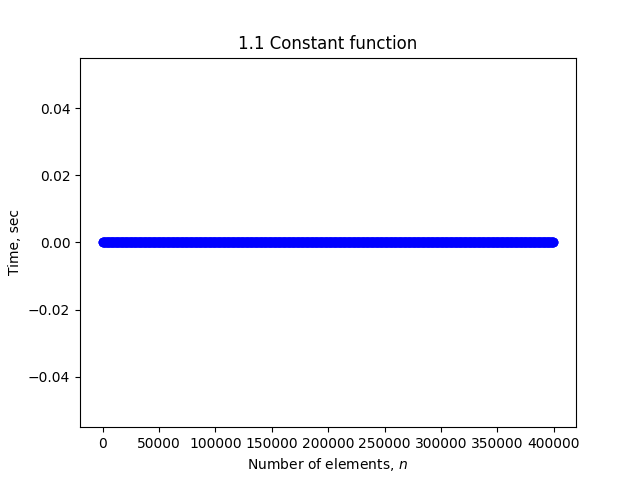

In [ ]:
def f3(v) :
    res = 1
    for k in v:
        res *= k
    return res

func = get_usage_time(number=5, ndigits=5)(f3)
creater_grafs(func, name_vec[1], 0)

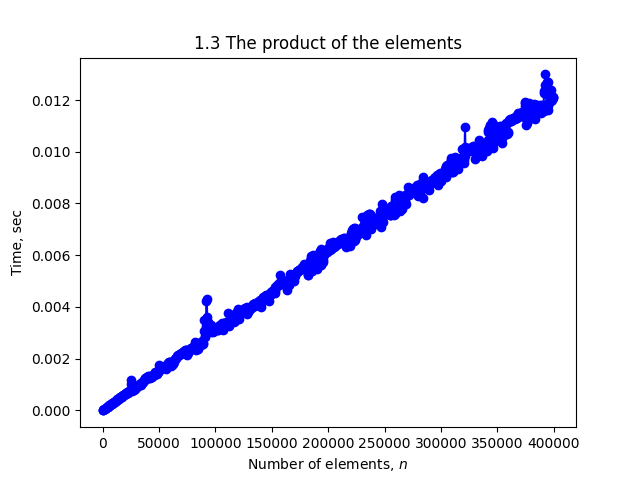

In [ ]:
def f4(v) :
    res = 0
    for k in v[::-1]:
        res += k +res*x
    return res

func = get_usage_time(number=5, ndigits=5)(f4)
creater_grafs(func, name_vec[2], 0)

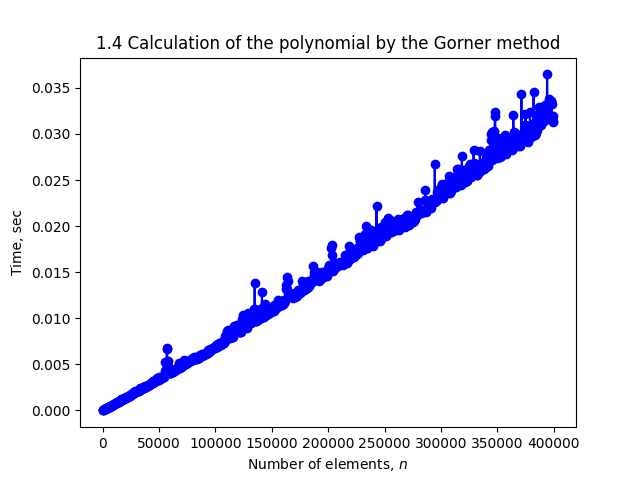

In [ ]:
def f5(v) :
    res = 0
    for k in v:
        if k > res :
            res = k
    return res

func = get_usage_time(number=5, ndigits=5)(f5)
creater_grafs(func, name_vec[3], 0)

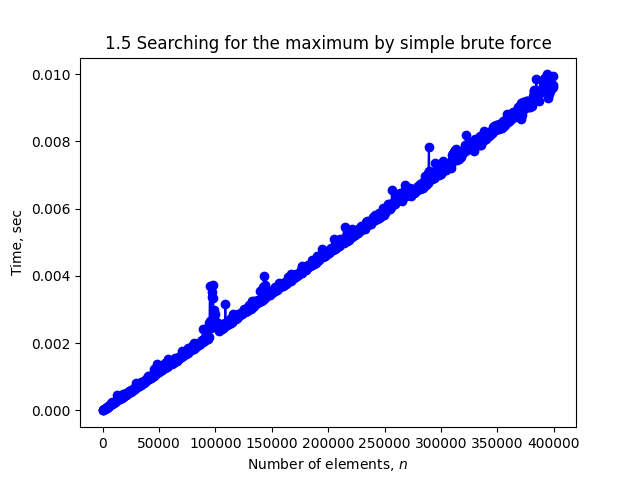

In [ ]:
def f7(v) :
    res = 0
    for k in v:
        res += k
    return res/len(v)

func = get_usage_time(number=5, ndigits=5)(f7)
creater_grafs(func, name_vec[4], 0)

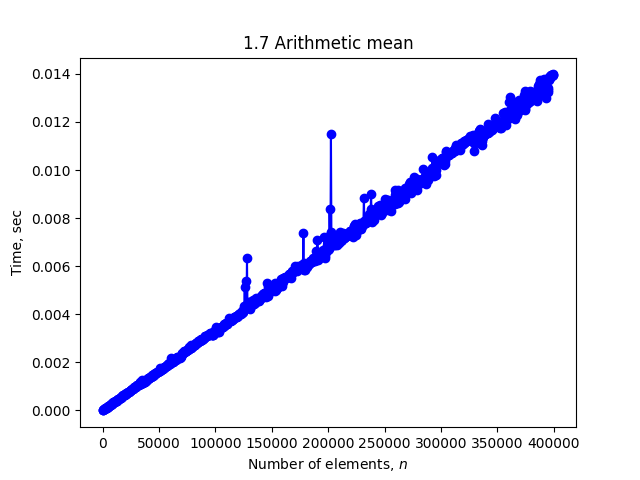

In [ ]:
def matrix_multiplication(A, B) :
    return np.dot(A, B)
    
func = get_usage_time(number=5, ndigits=5)(matrix_multiplication)
creater_grafs(func, name_vec[5], 1)

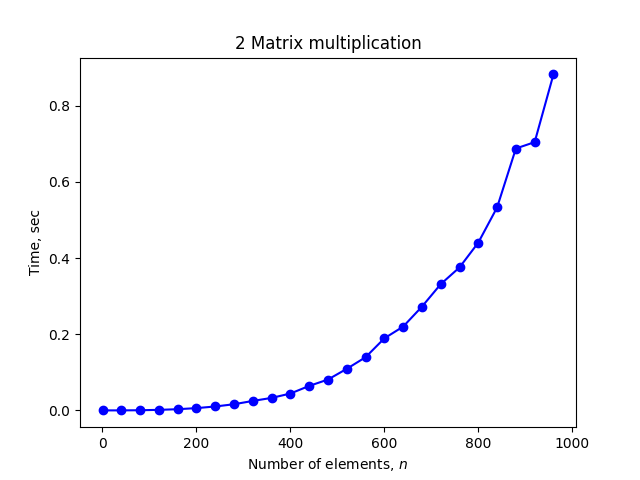